In [1]:
import numpy as np

class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R


In [6]:
N =  3000
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 0.5, 25)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []
p_mixing_time64 = []

for i in range(len(b)):
    t_p_mixing = 0
    t_p_mixing64 = 0
    for j in range(15):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        p_mix_index64 = np.min(np.where(R==64)[0])
        t_p_mixing += times[p_mix_index]
        t_p_mixing64 += times[p_mix_index64]
    p_mixing_time64.append(t_p_mixing64/15)
    p_mixing_times.append(t_p_mixing/15)
    print(t_p_mixing/15)
    print(t_p_mixing64/15)

print(p_mixing_times)
print(p_mixing_time64)

7.570082090407449
3.8184777447215605
8.476055084802466
4.122771443576083
9.388617069110655
4.400340290936743
10.81645713550938
4.714543445245067
11.75209758782011
5.222872998569433
16.51522391046726
5.862061950327106
18.450229423494868
6.52996863622521
28.793827671915786
8.184443916609222
60.8125096094129
10.709173898702078
105.28262573307885
19.1567802998821
64.98865922474758
36.196299306244114
51.397506238734465
30.79886640833237
41.7736823879118
26.91628769636963
34.842894902674175
23.057588050858886
30.99851981120076
20.289362031355378
27.53925211502906
18.54233876442633
24.1787557225604
16.870406765956442
23.32952142276116
15.126447751404129
21.231212895317874
14.21703072771531
19.214612204123586
13.373484264271013
17.754570717165844
12.402815171271278
17.2114971429837
11.614592989819197
15.72961173304995
11.144100871326081
15.08515097308725
10.461646490011761
14.227104845622838
9.90742780663934
[7.570082090407449, 8.476055084802466, 9.388617069110655, 10.81645713550938, 11.752097

In [7]:
p_mixing_times = [7.570082090407449, 8.476055084802466, 9.388617069110655, 10.81645713550938, 11.75209758782011, 16.51522391046726, 18.450229423494868, 28.793827671915786, 60.8125096094129, 105.28262573307885, 64.98865922474758, 51.397506238734465, 41.7736823879118, 34.842894902674175, 30.99851981120076, 27.53925211502906, 24.1787557225604, 23.32952142276116, 21.231212895317874, 19.214612204123586, 17.754570717165844, 17.2114971429837, 15.72961173304995, 15.08515097308725, 14.227104845622838]
p_mixing_time64 = [3.8184777447215605, 4.122771443576083, 4.400340290936743, 4.714543445245067, 5.222872998569433, 5.862061950327106, 6.52996863622521, 8.184443916609222, 10.709173898702078, 19.1567802998821, 36.196299306244114, 30.79886640833237, 26.91628769636963, 23.057588050858886, 20.289362031355378, 18.54233876442633, 16.870406765956442, 15.126447751404129, 14.21703072771531, 13.373484264271013, 12.402815171271278, 11.614592989819197, 11.144100871326081, 10.461646490011761, 9.90742780663934]

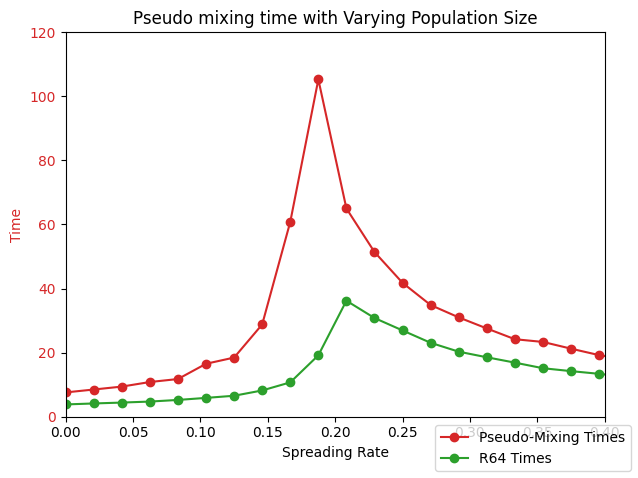

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b, p_mixing_times, color=color, marker = 'o', label= 'Pseudo-Mixing Times')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 0.4)
ax1.set_ylim(0, 120)
color = 'tab:green'
ax1.plot(b, p_mixing_time64, color=color, marker = 'o', label= 'R64 Times')

fig.legend(loc = 'lower right')
plt.title('Pseudo mixing time with Varying Population Size')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
